In [2]:
#import all essential libraries for my project
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

 

In [3]:
from google.colab import drive
# Mounting my Google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 limit = 1873
users = ['5','6','7','8','10','12','13','14','15','16','17']

data = pd.read_excel('F_Data.csv.xlsx')

par = pd.read_excel('participants_label.xlsx')
labelList = []
userList = []
for user in users:
  label = par[par.ID==int(user)].values
  label = label[0][4]
  labelList = labelList+([label]*limit)
  userList = userList+([int(user)]*limit)

data['users'] = userList
data['label'] = labelList

print(data.head)

<bound method NDFrame.head of               X         Y         Z        XX        YY        ZZ       XXX  \
0     -0.097108  0.831128  0.603586 -0.148379 -0.050721  1.031815 -0.208927   
1     -0.101991  0.836988  0.598703 -0.151797 -0.036561  1.035233 -0.191348   
2     -0.104433  0.836500  0.597726 -0.145937 -0.042908  1.020096 -0.161074   
3     -0.104921  0.839429  0.609445 -0.154238 -0.038025  1.025956 -0.136660   
4     -0.104921  0.821363  0.591867 -0.147402 -0.031189  1.028397 -0.125917   
...         ...       ...       ...       ...       ...       ...       ...   
20598  0.179751  0.928298  0.306706 -0.077089 -0.159609  0.979568  0.129946   
20599  0.165103  0.937087  0.332586 -0.080018 -0.157656  0.970291  0.117739   
20600  0.165591  0.930251  0.328191 -0.068788 -0.163516  0.958083  0.120668   
20601  0.174380  0.935622  0.327214 -0.076600 -0.161074  0.955154  0.120668   
20602  0.171939  0.923903  0.321843 -0.077577 -0.164004  0.970779  0.126528   

            YYY      

In [ ]:
X = data.iloc[:, :9]
Y = data.iloc[:, -1]
print(X)
print(Y)

              X         Y         Z        XX        YY        ZZ       XXX  \
0     -0.097108  0.831128  0.603586 -0.148379 -0.050721  1.031815 -0.208927   
1     -0.101991  0.836988  0.598703 -0.151797 -0.036561  1.035233 -0.191348   
2     -0.104433  0.836500  0.597726 -0.145937 -0.042908  1.020096 -0.161074   
3     -0.104921  0.839429  0.609445 -0.154238 -0.038025  1.025956 -0.136660   
4     -0.104921  0.821363  0.591867 -0.147402 -0.031189  1.028397 -0.125917   
...         ...       ...       ...       ...       ...       ...       ...   
20598  0.179751  0.928298  0.306706 -0.077089 -0.159609  0.979568  0.129946   
20599  0.165103  0.937087  0.332586 -0.080018 -0.157656  0.970291  0.117739   
20600  0.165591  0.930251  0.328191 -0.068788 -0.163516  0.958083  0.120668   
20601  0.174380  0.935622  0.327214 -0.076600 -0.161074  0.955154  0.120668   
20602  0.171939  0.923903  0.321843 -0.077577 -0.164004  0.970779  0.126528   

            YYY       ZZZ  
0     -0.052674  1.0332

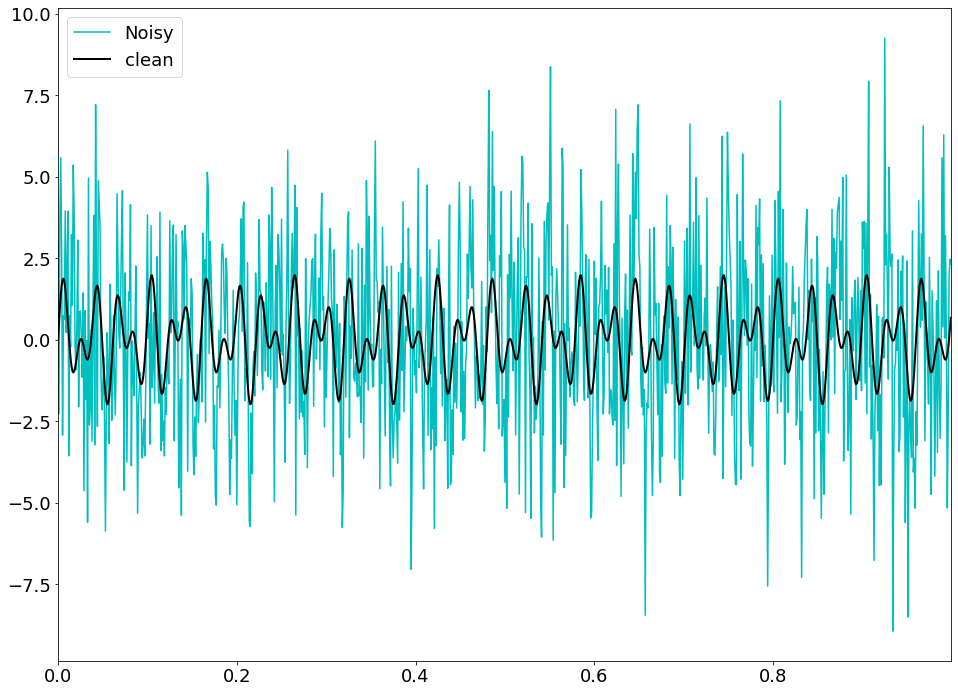

In [ ]:
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 18})

#create a simple signal with two frequencies
t = pd.read_excel('F_Data.csv.xlsx')
dt = 0.001
t= np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*31.25*t)    #sum of 2 frequencies
f_clean = f
f = f +2.5*np.random.randn(len(t))                            #Add some noise

plt.plot(t,f,color='c' , LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k' ,LineWidth=2,label='clean')
plt.xlim(t[0],t[-1])
plt.legend()

In [ ]:
import pandas as pd

#data = pd.read_excel('participants_label.xlsx')
#print(data.head)

<bound method NDFrame.head of     ID     Sex   Status  Age  label
0    5  Female  Control   74      0
1    6    Male       PD   73      1
2    7  Female  Control   52      0
3    8  Female  Control   77      0
4   10  Female       PD   72      1
5   12  Female       PD   64      1
6   13  Female       PD   60      1
7   14  Female  Control   56      0
8   15    Male       PD   65      1
9   16  Female  Control   62      0
10  17    Male       PD   74      1
11  18  Female  Control   66      0
12  20  Female  Control   68      0
13  22    Male  Control   68      0
14  23  Female       PD   68      1
15  24    Male       PD   62      1
16  25  Female       PD   72      1
17  27  Female  Control   54      0
18  30  Female  Control   68      0
19  33    Male       PD   46      1
20  35    Male       PD   67      1
21  36    Male       PD   69      1
22  38    Male       PD   78      1
23  39  Female  Control   74      0
24  40  Female       PD   75      1
25  41    Male  Control   75      

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_real_test, X_val, y_real_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

# New Section

In [ ]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [ ]:
# Predict from the test dataset
predictions = svn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9206503275903907

In [ ]:
X_train

,X,Y,Z,XX,YY,ZZ,XXX,YYY,ZZZ
10452,0.047913,0.816480,0.625559,-0.205509,-0.208927,0.997147,-0.276310,0.055726,1.033768
19376,0.125551,0.945876,0.343328,-0.083436,-0.165469,0.981033,0.223697,0.043030,1.030838
18060,0.005432,0.941970,-0.082460,-0.216739,0.227115,0.984451,0.305730,0.024475,1.071855
3184,0.012757,0.986893,-0.054627,-0.327581,-0.143496,0.932692,-0.230900,0.156802,0.984451
16582,-0.273869,0.525948,0.838453,-0.210880,-0.017517,0.979568,-0.214786,-0.119570,0.999100
...,...,...,...,...,...,...,...,...,...
15234,-0.339788,0.597238,0.777905,-0.159609,-0.122499,0.995682,-0.211368,-0.194278,1.000076
3130,0.017151,0.991775,-0.047791,-0.334905,-0.124941,0.924880,-0.222599,0.188052,1.020584
5070,0.022522,1.103105,0.539620,-0.103456,-0.110780,1.044022,-0.120546,-0.006775,0.937575
6824,0.066957,0.893629,0.466865,-0.269474,0.320867,0.952224,0.187076,0.559640,0.851637


In [ ]:
import numpy as np
#define data 
X = np.array([5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17])
Y = np.array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1]) 

In [ ]:
import statsmodels.api as sm

#calculate cross correlation
sm.tsa.stattools.ccf(X, Y, adjusted=False)

array([ 0.26846672,  0.12353224,  0.22228293,  0.08147871,  0.22979249,
        0.07246724, -0.08072775, -0.25457403, -0.13930231,  0.00075096,
       -0.14418352])

In [ ]:
X = data.iloc[:, :9]
Y = data.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_real_test, X_val, y_real_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=11)

# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
# Predict from the test dataset
predictions = logreg.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8437272506673138

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1388,  427],
       [ 217, 2089]])

Text(0.5, 257.44, 'Predicted label')

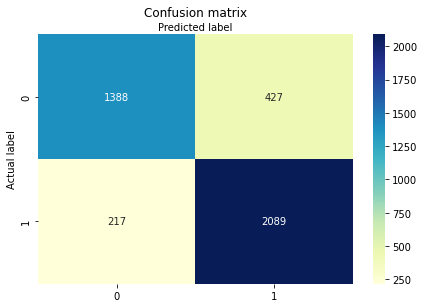

In [ ]:
from matplotlib import text
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#text(0.5,257.44,'Predicted label');

In [ ]:
from sklearn.metrics import classification_report
target_names = ['without Parkinson', 'with Parkinson']
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

without Parkinson       0.86      0.76      0.81      1815
   with Parkinson       0.83      0.91      0.87      2306

         accuracy                           0.84      4121
        macro avg       0.85      0.84      0.84      4121
     weighted avg       0.85      0.84      0.84      4121



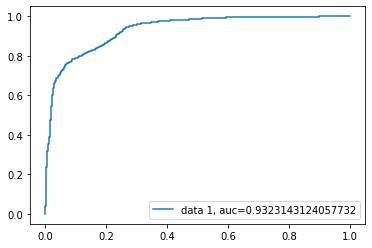

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from scipy import stats

In [ ]:
t2 = stats.ttest_ind(X,Y)
print(t2)

Ttest_indResult(statistic=array([-154.00341619,   85.52251216,  -27.37731767, -204.85948695,
       -163.11743978,  109.67207718, -175.51141086, -127.92940688,
        119.5244973 ]), pvalue=array([0.00000000e+000, 0.00000000e+000, 1.49557171e-163, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000]))
